# Understanding the dataset

#### The dataset is the UBER stocks dataset that contains seven records, including date, opening value of the stock, closing value of the stock, high and low values of stock that day, the adjacent closing value of the stock, and the volume of stocks that had been traded that day.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("UBER.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [26]:
data.describe() #Helps us get more insight into the dataset

,Open,High,Low,Close,Adj Close,Volume
count,634.000000,634.000000,634.000000,634.000000,634.000000,6.340000e+02
mean,40.507774,41.274827,39.623454,40.448707,40.448707,2.351917e+07
std,9.652290,9.729066,9.511428,9.589767,9.589767,1.696142e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.522500,33.153750,31.652500,32.592500,32.592500,1.361415e+07
50%,39.900002,40.639999,39.055000,39.914999,39.914999,1.926890e+07
75%,47.807500,48.815001,47.140002,47.730000,47.730000,2.830438e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


##### From the above table, we can get several insights into the dataset. We can know a lot of useful information from the above table such as mean, standard deviation, value counts, and how often a value occurs in the dataset.

#### Null value check

<AxesSubplot:>

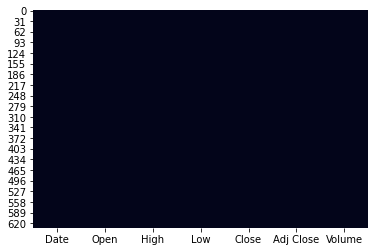

In [27]:
sns.heatmap(data.isnull(), cbar=False) # to check null values

###### As we can see there are no null values in the dataset

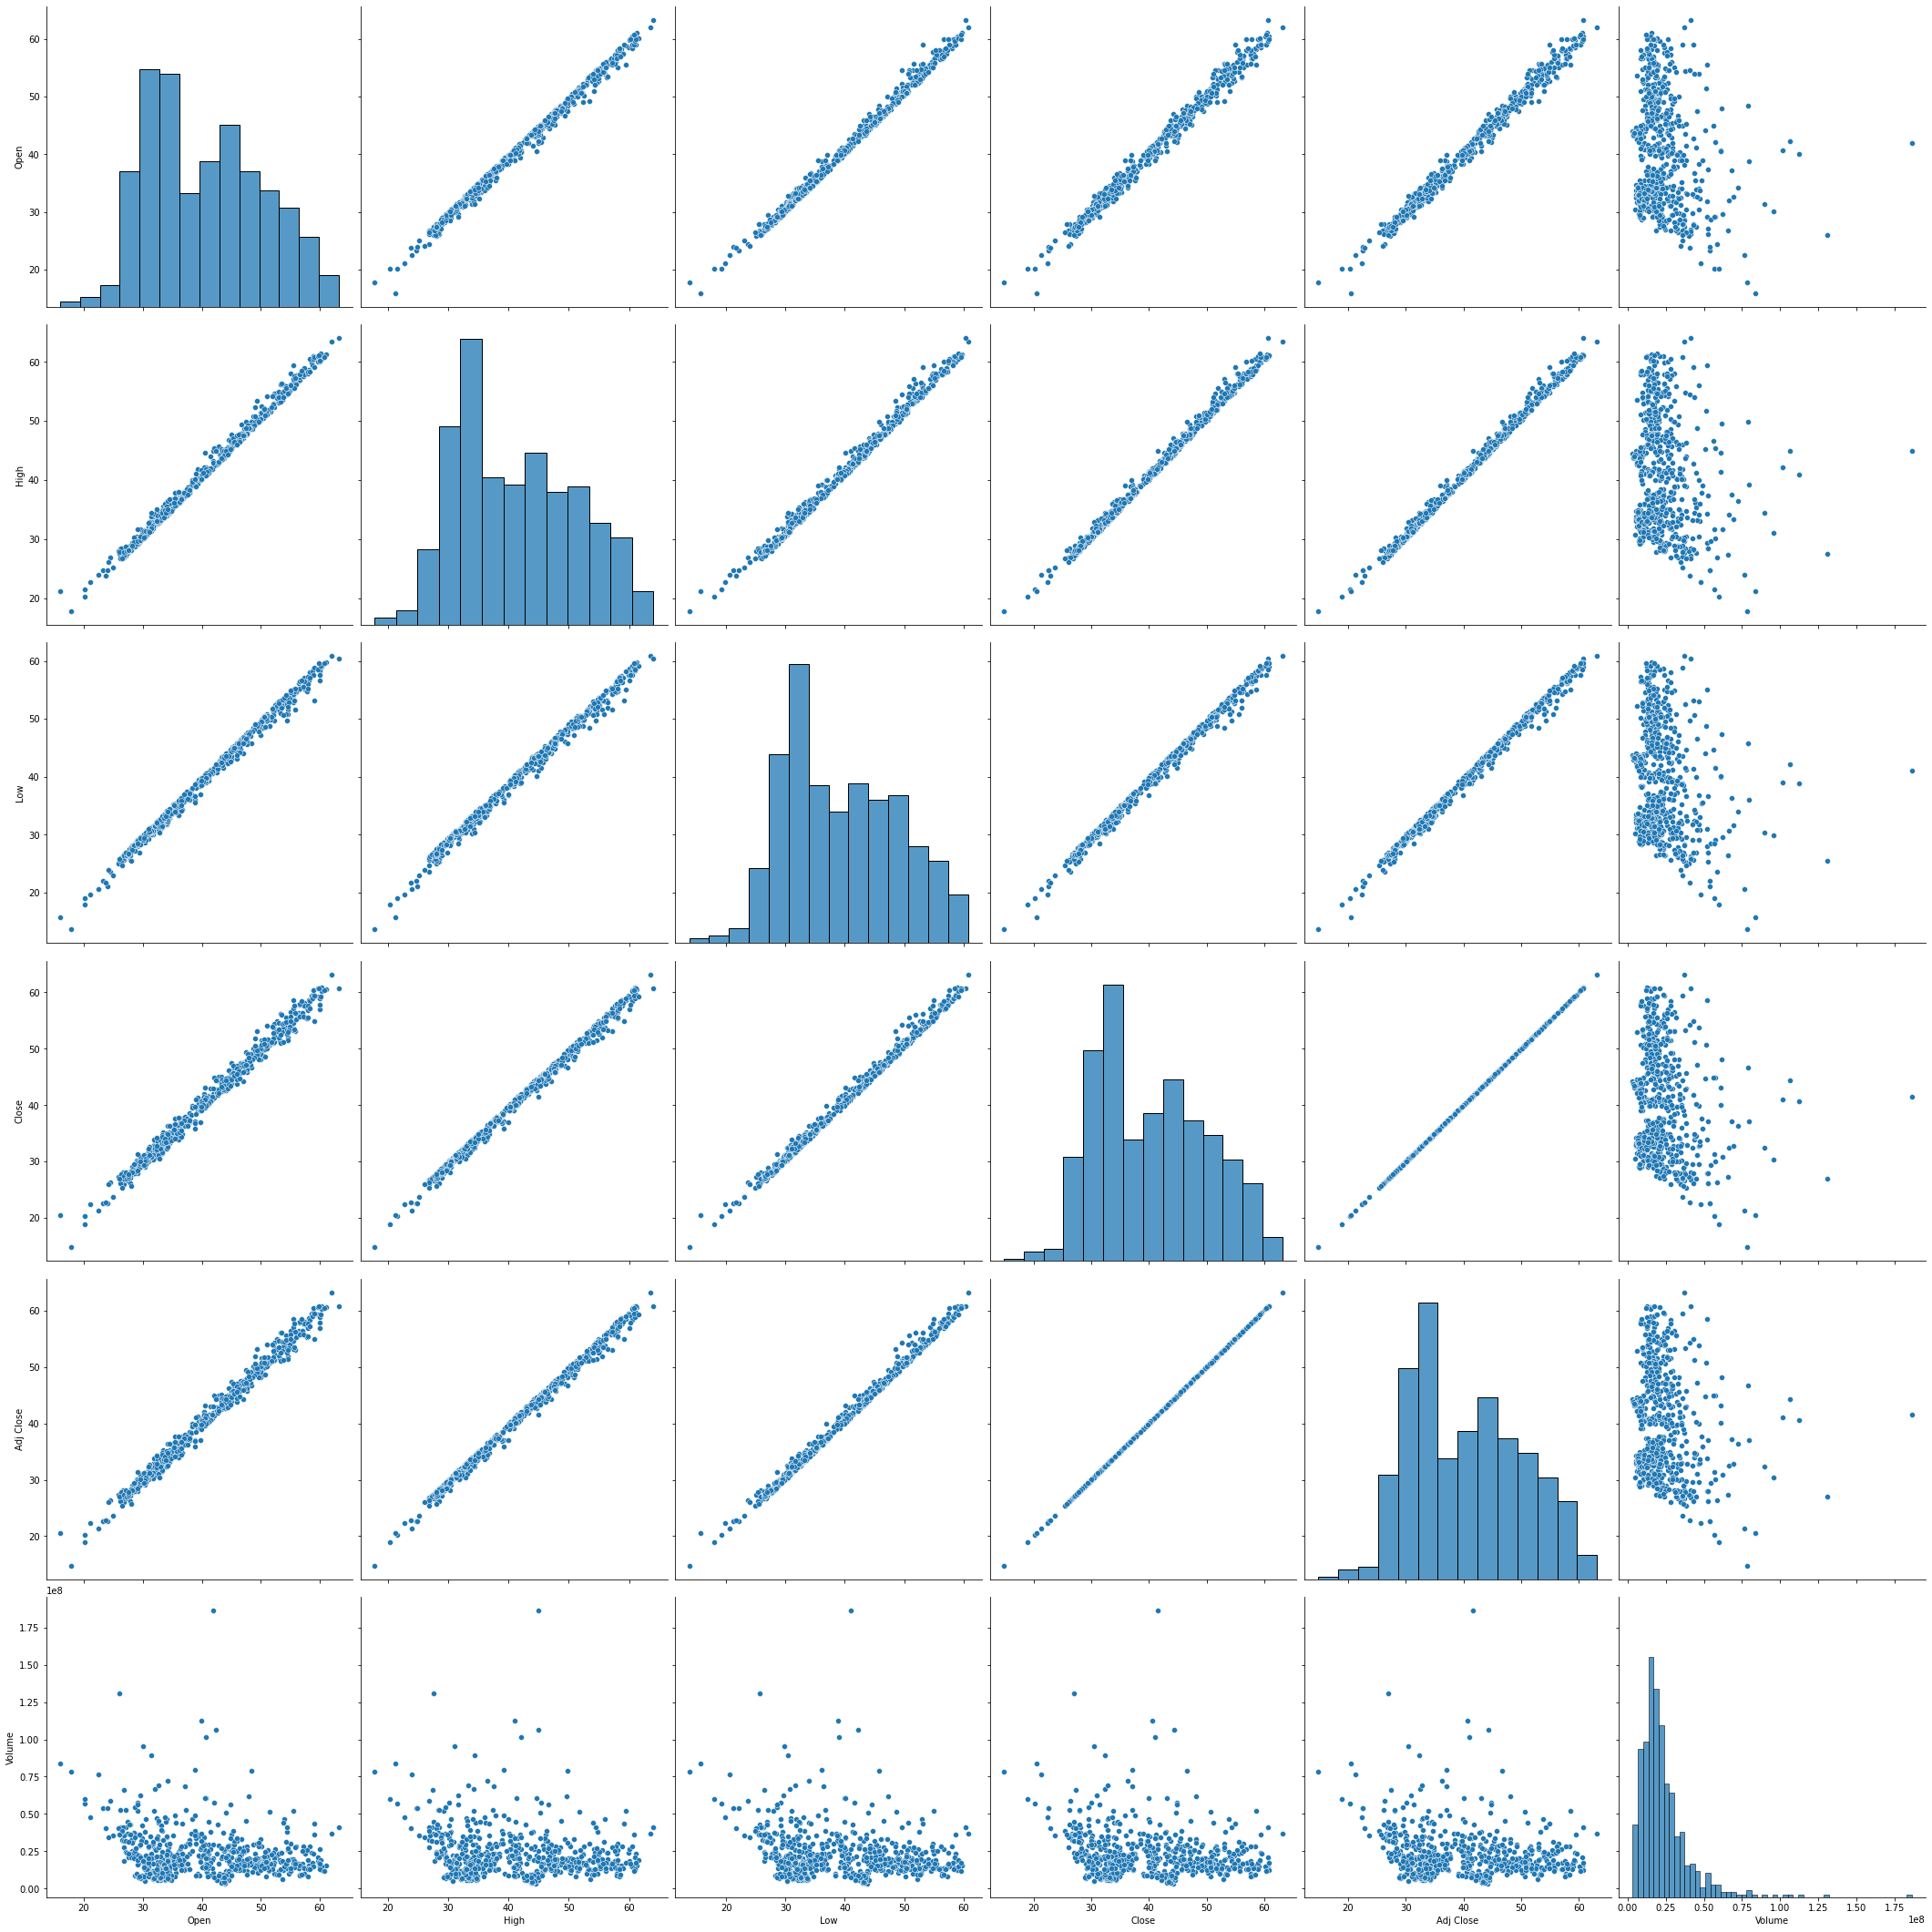

In [28]:
#Getting the general sense of the data

sns.pairplot(data,height=5)

#### Finding correlation

<AxesSubplot:>

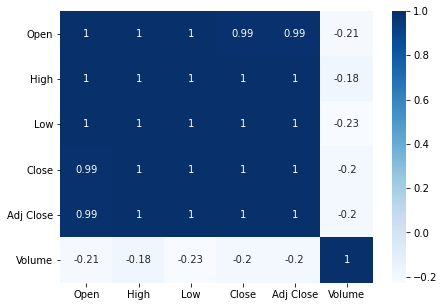

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

###### From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values.

In [30]:
data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['close-low'] = data['Close'] - data['Low']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,-3.000000,0.939999,-3.430000,0.509999,3.939999,0.430000
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-0.450001,2.709999,-2.140004,1.019996,3.160000,1.690003
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,-1.649998,1.460003,0.000000,3.110001,3.110001,-1.649998
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,-2.510002,0.419998,-0.590000,2.340000,2.930000,-1.920002
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,-2.580001,0.230000,-1.060001,1.750000,2.810001,-1.520000


###### We have added 6 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

<AxesSubplot:>

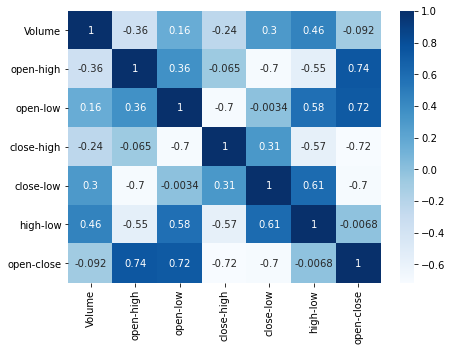

In [31]:
data2 = data.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

In [32]:
#Some more multivariate analysis

<AxesSubplot:xlabel='open-high', ylabel='Volume'>

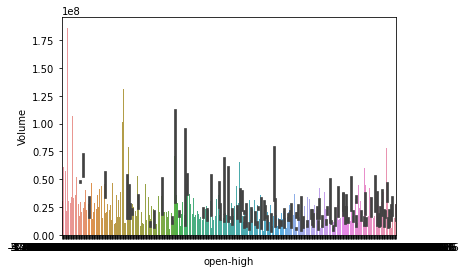

In [33]:
sns.barplot(data=data, x = "open-high", y="Volume")

###### The ‘high-low’ feature shows the maximum value of correlation with the ‘volume’ feature. Thus we can think that a greater fluctuation in the stock price may be a reason behind more transactions of stocks that day.

###### From the below graph you can observe the volume of stocks traded is high for larger values of high-low.

<AxesSubplot:xlabel='high-low', ylabel='Volume'>

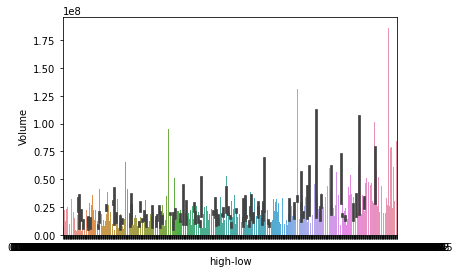

In [34]:
sns.barplot(data=data, x = "high-low", y="Volume")

###### Thus from this EDA we were able to get a broad outlook on the data and  gain useful insights.